La pregunta que queremos hacernos a cerca del dataset "cuisine" es una pregunta de multiclases. 
Dado un grupo de ingredientes, que tipo de cocina podemos hacer? (china, india, etc)

### Clean and balance your data

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
from imblearn.over_sampling import SMOTE

In [13]:
df  = pd.read_csv('./data/cuisines.csv')
df

,Unnamed: 0,cuisine,almond,angelica,anise,anise_seed,apple,apple_brandy,apricot,armagnac,...,whiskey,white_bread,white_wine,whole_grain_wheat_flour,wine,wood,yam,yeast,yogurt,zucchini
0,65,indian,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,66,indian,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,67,indian,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,68,indian,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,69,indian,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2443,57686,japanese,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2444,57687,japanese,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2445,57688,japanese,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2446,57689,japanese,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Learning about cuisine

In [17]:
df.cuisine.value_counts()

cuisine
korean      799
indian      598
chinese     442
japanese    320
thai        289
Name: count, dtype: int64

In [18]:
# Find out how much data is available per cuisine and print it out:
thai_df = df[(df.cuisine == "thai")]
japanese_df = df[(df.cuisine == "japanese")]
chinese_df = df[(df.cuisine == "chinese")]
indian_df = df[(df.cuisine == "indian")]
korean_df = df[(df.cuisine == "korean")]

print(f'thai df: {thai_df.shape}')
print(f'japanese df: {japanese_df.shape}')
print(f'chinese df: {chinese_df.shape}')
print(f'indian df: {indian_df.shape}')
print(f'korean df: {korean_df.shape}')

thai df: (289, 385)
japanese df: (320, 385)
chinese df: (442, 385)
indian df: (598, 385)
korean df: (799, 385)


### Discovering ingredients


Ahora podemos profundizar en los datos y aprender cuales son los ingredientes típicos por gastronomía (cuisine). Debemos limpiar los datos que crean confusión entre las diferentes cocinas.

Creamos una función `create_ingredient()` para crear un ingredient dataframe. Esta función empezará colocando una unhelpful column y ordenerá los ingredientes por su cuenta.

In [20]:
def create_ingredient(df):
    ingredient_df = df.T.drop(['cuisine','Unnamed: 0']).sum(axis=1).to_frame('value')
    ingredient_df = ingredient_df[(ingredient_df.T != 0).any()]
    ingredient_df = ingredient_df.sort_values(by='value', ascending=False,
    inplace=False)
    return ingredient_df

# Use that function to get an idea of top ten most popular ingredients by cuisine.

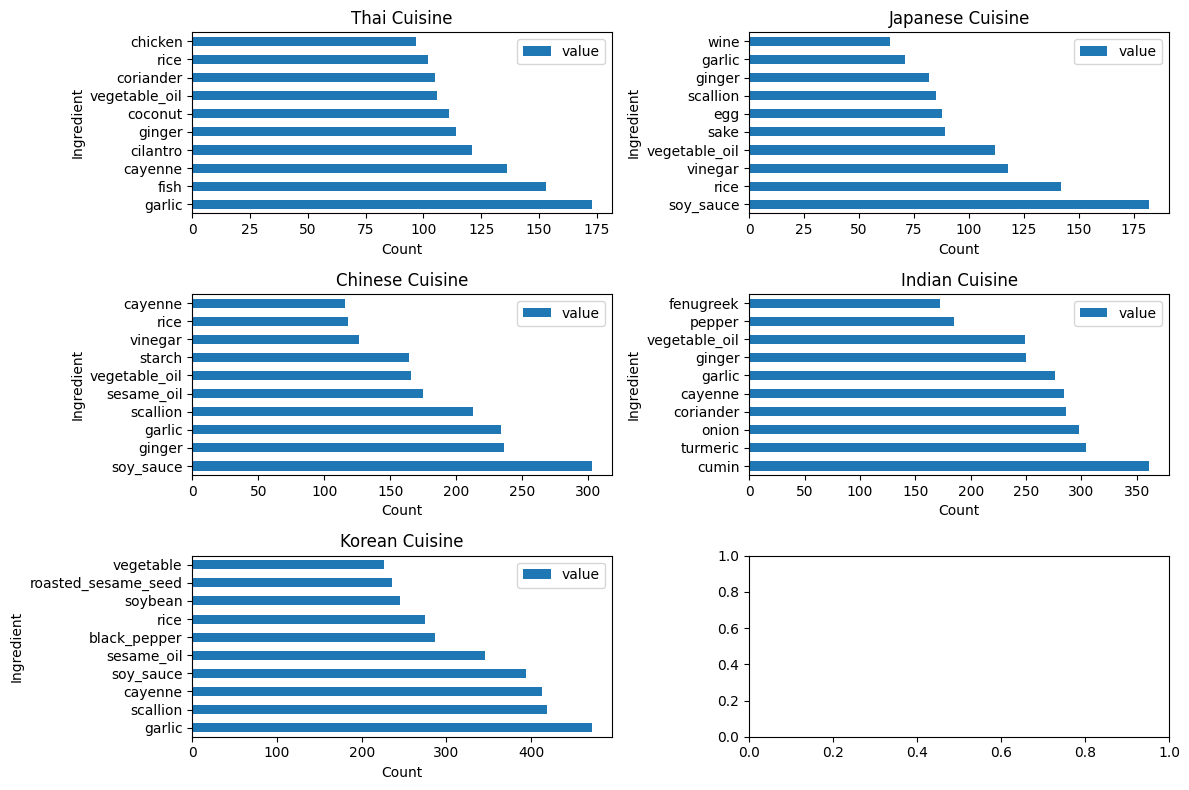

In [30]:
def create_and_plot_ingredient(ax, cuisine_df, title):
    ingredient_df = create_ingredient(cuisine_df)
    ingredient_df.head(10).plot.barh(ax=ax)
    ax.set_title(title)
    ax.set_xlabel('Count')
    ax.set_ylabel('Ingredient')

# Luego, puedes usar esta función en tu código para crear los subplots
fig, axs = plt.subplots(3, 2, figsize=(12, 8))

create_and_plot_ingredient(axs[0, 0], thai_df, "Thai Cuisine")
create_and_plot_ingredient(axs[0, 1], japanese_df, "Japanese Cuisine")
create_and_plot_ingredient(axs[1, 0], chinese_df, "Chinese Cuisine")
create_and_plot_ingredient(axs[1, 1], indian_df, "Indian Cuisine")
create_and_plot_ingredient(axs[2, 0], korean_df, "Korean Cuisine")

plt.tight_layout()
plt.show()

Ahora, suelta los ingredientes más comunes que crean confusión entre distintas cocinas, llamando a drop():

In [33]:
feature_df= df.drop(['cuisine','Unnamed: 0','rice','garlic','ginger'], axis=1)
labels_df = df.cuisine #.unique()

### Balance de Dataset

Now that you have cleaned the data, use SMOTE - "Synthetic Minority Over-sampling Technique" - to balance it.

1. Llamar a `fit_resample()`. Esta estrategia genera nuevas muestras por interpolación.

In [34]:
oversample = SMOTE()
transformed_feature_df, transformed_label_df = oversample.fit_resample(feature_df, labels_df)

Balanceando la data se tienen mejores resultados cuando se hace la clasificación. Pensemos en una clasificación binaria. Si la mayoria de los datos son de una clase, el modelo de ML va a predecir dicha clase con mas frecuencia, debido a que hay mas datos de la misma. Balancear los datos toma cualquier dato sesgado y ayuda a eliminar este desequilibrio.

2. Ahora puedes consultar el número de etiquetas por ingrediente:

In [35]:
print(f'new label count: {transformed_label_df.value_counts()}')
print(f'old label count: {df.cuisine.value_counts()}')

new label count: cuisine
indian      799
thai        799
chinese     799
japanese    799
korean      799
Name: count, dtype: int64
old label count: cuisine
korean      799
indian      598
chinese     442
japanese    320
thai        289
Name: count, dtype: int64


3. El último paso es guardar los datos equilibrados, incluidas las etiquetas y las características, en un nuevo marco de datos que se puede exportar a un archivo:

In [36]:
transformed_df = pd.concat([transformed_label_df,transformed_feature_df],axis=1, join='outer')

4. Puedes echar un vistazo más a los datos usando transformed_df.head() y transformed_df.info(). Guarde una copia de estos datos para usarlos posteriormente:

In [40]:
transformed_df.head()
transformed_df.info()
transformed_df.to_csv("./data/cleaned_cuisines.csv")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3995 entries, 0 to 3994
Columns: 381 entries, cuisine to zucchini
dtypes: int64(380), object(1)
memory usage: 11.6+ MB
